## Challenge code
 
 In the code below, you are given a function called `circuit`. **You must complete 
 this function** by constructing the following four-qubit circuit:
 
 <p align="center">
 <img src="./images/daily8.png" width="650"/>
 </p>
 
 The circuit has a Hadamard gate on every qubit, an $R_x$ gate, a couple of 
 CNOTs, and then the mid-circuit measurements. Note here that the measurements happen 
 on the first and third qubits, and that the [`qml.U3`](https://docs.pennylane.ai/en/stable/code/api/pennylane.U3.html) gate is only applied to the 
 fourth qubit if the following condition is met upon measuring the first and third 
 wires: $m_0 + m_2 \geq 1$ (i.e. at least one of them is $1$). The last operator, `qml.PauliZ` on the fourth qubit, is 
 applied regardless.
 
 The [`qml.measure`](https://docs.pennylane.ai/en/stable/code/api/pennylane.measure.html) 
 function should be helpful to you!
 
 ### Input 
 
 As input to this problem, you are given:
 
 - `angles` (`list(float)`): a list of angles containing $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$ in that order. Use this to create the circuit!
 
 ### Output
 
 This code must output a `numpy.tensor` containing  the probabilities associated to a computational basis measurement **on the fourth qubit.**
 
 If your solution matches the correct one within the given tolerance specified in `check` (in this case it's a `1e-4` relative error tolerance), the output will be `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.
 
 Good luck!
 ### Imports
 The cell below specifies the libraries you should use in this challenge. Run the cell to import the libraries. ***Do not modify the cell.***

In [12]:
import json
import pennylane as qml
from pennylane import numpy as np

### Code
 Complete the code below. Note that during QHack, some sections were not editable. We've marked those sections accordingly here, but you can still edit them if you wish.

In [13]:
# Uneditable section #
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(angles):
    """A quantum circuit made from the quantum function U.

    Args:
        angles (list(float)): A list of angles containing theta_0, theta_1, theta_2, and theta_3 in that order. 
    Returns:
        (numpy.tensor): The probability of the fourth qubit.
    """
    # End of uneditable section #
    qml.broadcast(qml.Hadamard,wires=range(4),pattern="single")
    qml.RX(angles[0],wires=0)
    qml.CNOT([0,3])
    qml.CNOT([2,1])

    a=qml.measure(wires=0)
    b=qml.measure(wires=2)
    output=a+b
    qml.cond(output>=1, qml.U3)(*angles[1:],wires=3)
    qml.PauliZ(3)
    # Put your code here #
    
    # Uneditable section #
    return qml.probs(wires=3)

(<Figure size 1100x600 with 1 Axes>, <Axes: >)
[0.79967628 0.20032372]


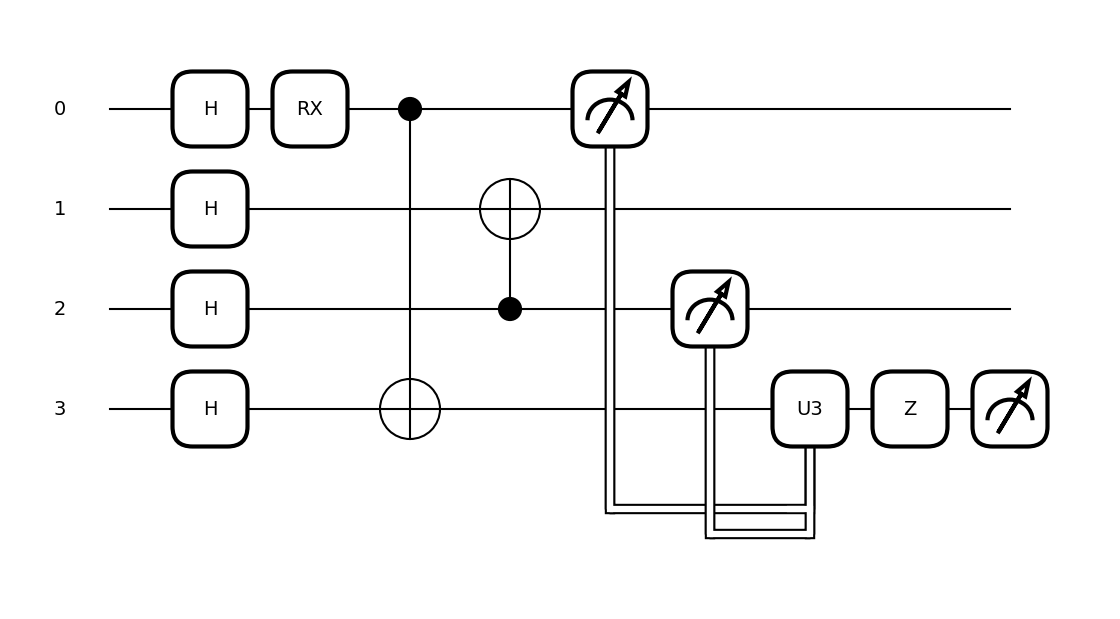

In [14]:
angles=[1,1.5,2.0,2.5]

print(qml.draw_mpl(circuit)(angles))
print(circuit(angles))

These functions are responsible for testing the solution. You will need to run the cell below. ***Do not modify the cell.***

In [15]:
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(angles).tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)

### Test cases
 Running the cell below will load the test cases. ***Do not modify the cell***.
 - input: [1.0, 1.5, 2.0, 2.5]
 	+ expected output: [0.79967628, 0.20032372]
 - input: [1.0, 1.1, 2.2, 1.5]
 	+ expected output: [0.47635943, 0.52364057]
 - input: [5.1, 6.1, 0.2, 2.5]
 	+ expected output: [0.44527313, 0.55472687]

In [16]:
test_cases = [['[1.0, 1.5, 2.0, 2.5]', '[0.79967628, 0.20032372]'], ['[1.0, 1.1, 2.2, 1.5]', '[0.47635943, 0.52364057]'], ['[5.1, 6.1, 0.2, 2.5]', '[0.44527313, 0.55472687]']]

### Solution testing
 Once you have run every cell above, including the one with your code, the cell below will test your solution. Run the cell. If you are correct for all of the test cases, it means your solutions is correct. Otherwise, you need to double check your work. ***Do not modify the cell below.***

In [17]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1.0, 1.5, 2.0, 2.5]'...
Correct!
Running test case 1 with input '[1.0, 1.1, 2.2, 1.5]'...
Correct!
Running test case 2 with input '[5.1, 6.1, 0.2, 2.5]'...
Correct!
